(312, 310)
(312, 310)


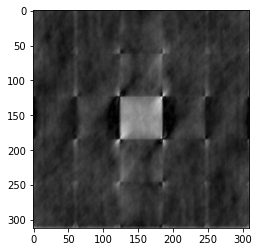

In [100]:
# https://stackoverflow.com/questions/52312053/how-to-combine-the-phase-of-one-image-and-magnitude-of-different-image-into-1-im
grayA = cv2.imread('lena.jpg',0)
f = np.fft.fft2(grayA)
fshift1 = np.fft.fftshift(f)

phase_spectrumA = np.angle(fshift1)
magnitude_spectrumA = 20*np.log(np.abs(fshift1))


grayB = cv2.imread('whiteBoxResized.jpg',0)
f2 = np.fft.fft2(grayB)
fshift2 = np.fft.fftshift(f2)
phase_spectrumB = np.angle(fshift2)
magnitude_spectrumB = 20*np.log(np.abs(fshift2))

print((np.abs(f)).shape)
print((np.exp(1j*np.angle(f))).shape)

#try different combinations in the following line
combined = np.multiply(np.abs(f), np.exp(1j*np.angle(f2)))

newInSpatial = np.fft.ifft2(combined)
# img_back = np.real(np.fft.ifft2(newInSpatial))
img_back = np.abs(newInSpatial)

# imgCombined = np.real(np.fft.ifft2(combined))
# imgCombined = np.abs(imgCombined)
import matplotlib.pyplot as plt
# plt.imshow(imgCombined, cmap='gray')
# plt.clf()
plt.imshow(img_back, cmap='gray')


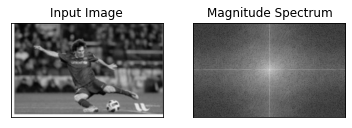

In [71]:
# https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

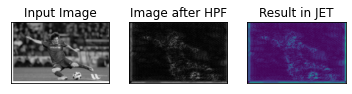

In [68]:
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)


#using stackoverflow method:
fshiftInv = np.fft.ifftshift(fshift)
new = np.multiply(np.abs(fshiftInv), np.exp(1j*np.angle(fshiftInv)))
newInSpatial = np.fft.ifft2(new)
# img_back = np.real(np.fft.ifft2(newInSpatial))
img_back = np.abs(newInSpatial)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()

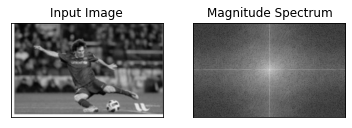

In [101]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

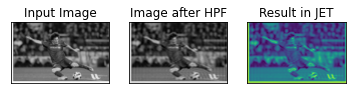

In [103]:
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)

mask = np.zeros((rows,cols),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

fshift = fshift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)


#using stackoverflow method:
fshiftInv = np.fft.ifftshift(fshift)
new = np.multiply(np.abs(fshiftInv), np.exp(1j*np.angle(fshiftInv)))
newInSpatial = np.fft.ifft2(new)
# img_back = np.real(np.fft.ifft2(newInSpatial))
img_back = np.abs(newInSpatial)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()